Logistic Regression Classification Report:
                    precision    recall  f1-score   support

    inactive - exp       0.00      0.00      0.00        26
inactive - virtual       1.00      0.95      0.97       234
       mod. active       0.44      0.65      0.53        23
       very active       0.08      1.00      0.14         2

          accuracy                           0.84       285
         macro avg       0.38      0.65      0.41       285
      weighted avg       0.86      0.84      0.84       285

K-Nearest Neighbors Classification Report:
                    precision    recall  f1-score   support

    inactive - exp       0.64      0.69      0.67        26
inactive - virtual       1.00      1.00      1.00       234
       mod. active       0.63      0.52      0.57        23
       very active       0.00      0.00      0.00         2

          accuracy                           0.93       285
         macro avg       0.57      0.55      0.56       285
      wei

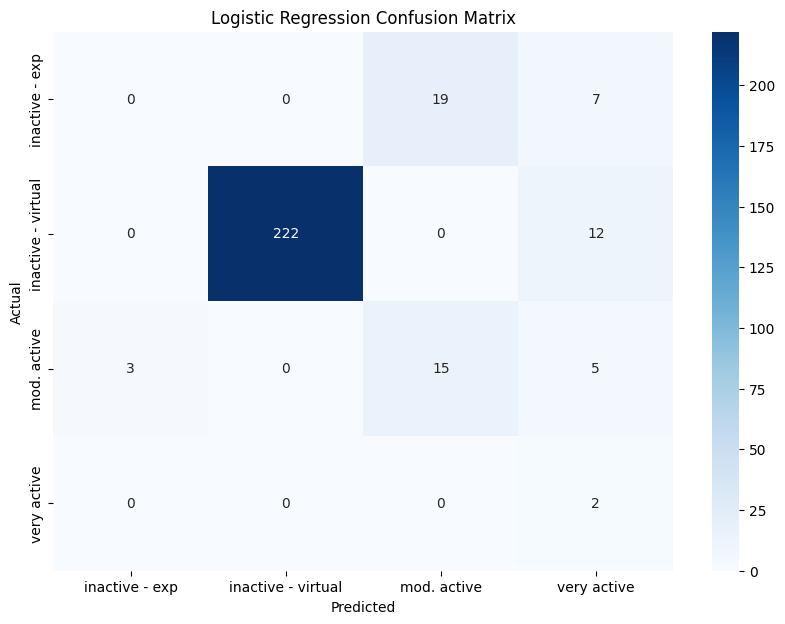

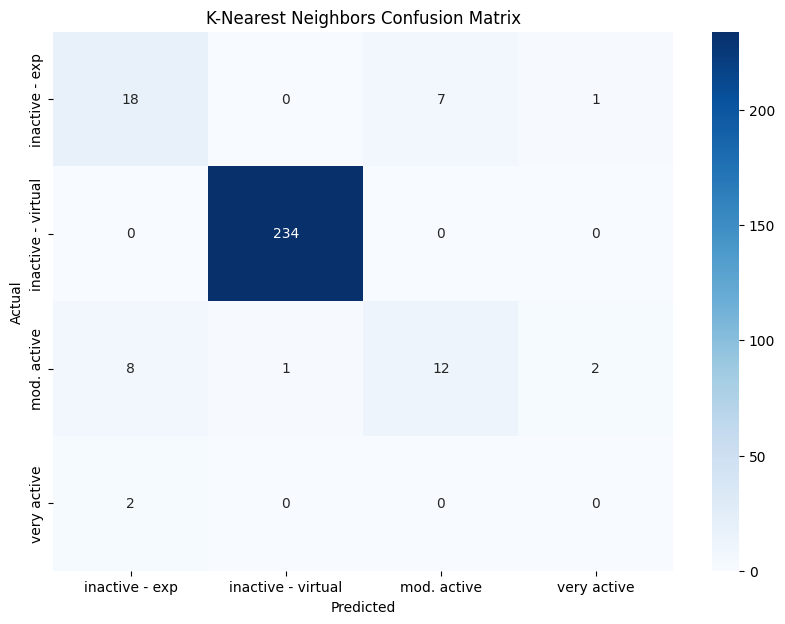

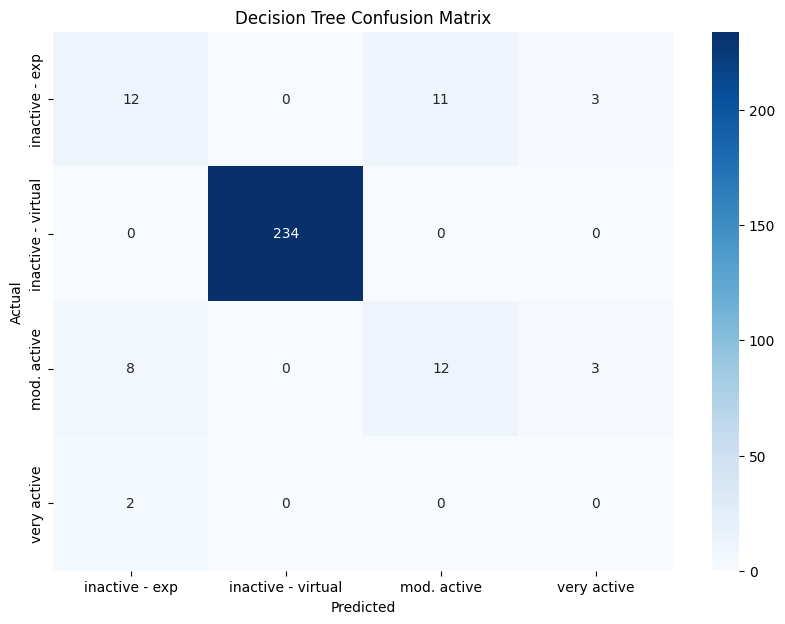

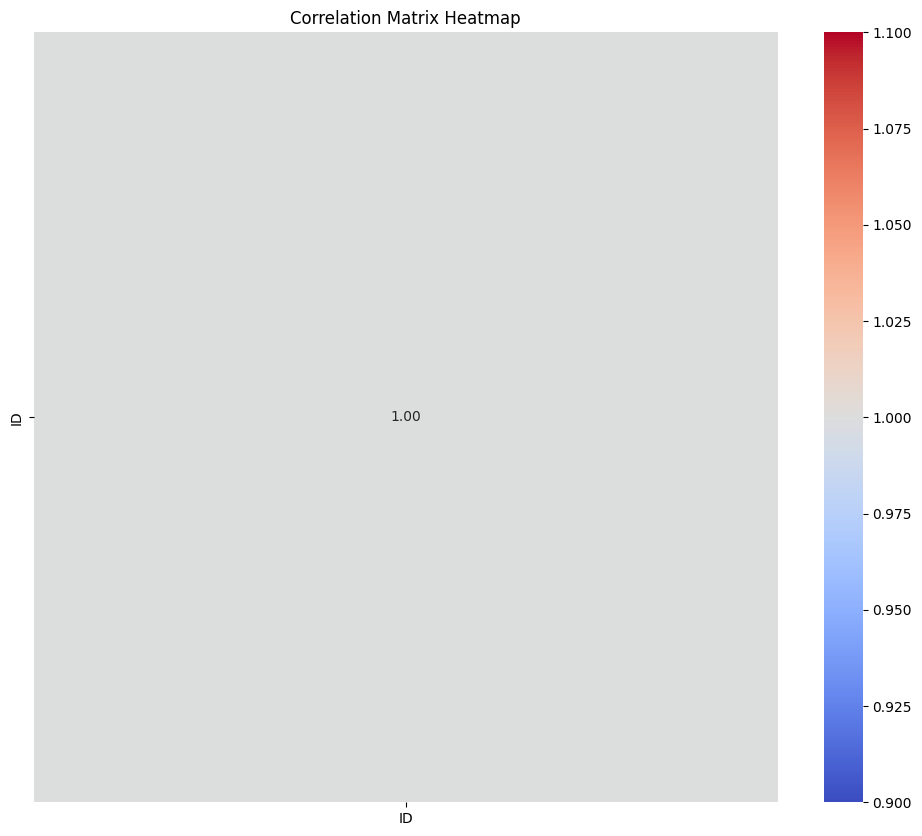

Selected Features based on correlation threshold 0.5:
Index(['ID'], dtype='object')


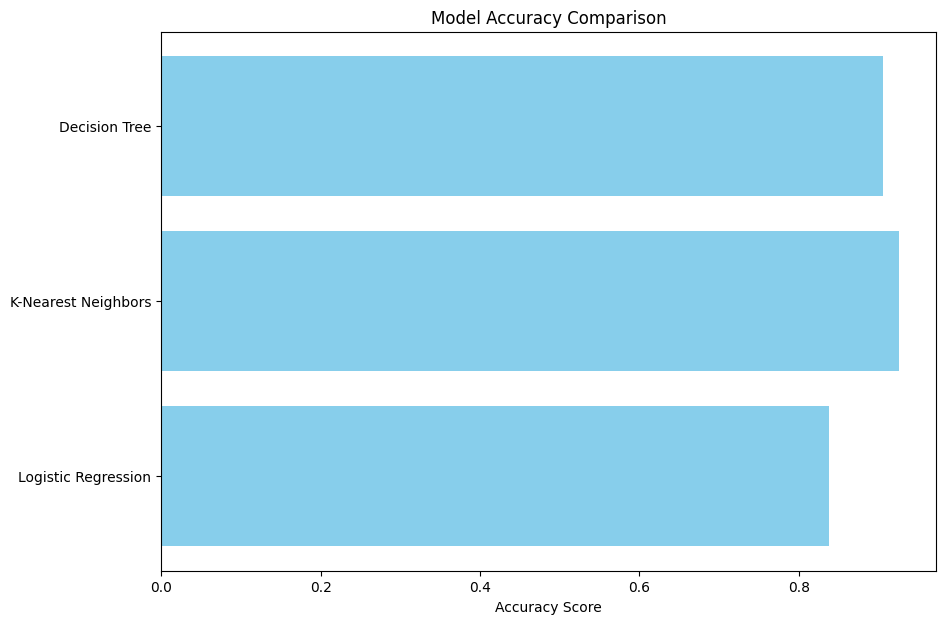

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
breast_cancer_df = pd.read_csv("ACPs_Breast_cancer.csv")

# Drop non-numeric columns and handle missing values
df_numeric = breast_cancer_df.select_dtypes(include=['float64', 'int64'])
df_numeric = df_numeric.dropna()  # Or use df_numeric.fillna() for imputation

# Target column
target_column = 'class'

# Check for missing values in target column
if breast_cancer_df[target_column].isna().any():
    raise ValueError("Target column contains missing values. Please handle them before proceeding.")

# Separate features and target
X = df_numeric
y = breast_cancer_df[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced')
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=1)
    conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
    
    results[name] = {
        'accuracy': accuracy,
        'classification_report': class_report,
        'confusion_matrix': conf_matrix
    }

# Print Classification Reports
for name, result in results.items():
    print(f"{name} Classification Report:")
    print(result['classification_report'])

# Plot Confusion Matrix Heatmaps
for name, result in results.items():
    plt.figure(figsize=(10, 7))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', 
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Correlation Matrix
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Feature Selection based on Correlation
# Assuming we want to keep features with correlation > 0.5 with any other feature
threshold = 0.5
selected_features = correlation_matrix.columns[(correlation_matrix.abs() > threshold).any()]
print(f"Selected Features based on correlation threshold {threshold}:")
print(selected_features)

# Accuracy Score Plot
accuracy_scores = [result['accuracy'] for result in results.values()]
model_names = list(results.keys())
plt.figure(figsize=(10, 7))
plt.barh(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.show()